In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("../churn.db")
df = pd.read_sql("SELECT * FROM customers", conn)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn distribution confirms moderate class imbalance (~27% churn).
Accuracy alone would be misleading.


In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.duplicated().sum()

np.int64(0)

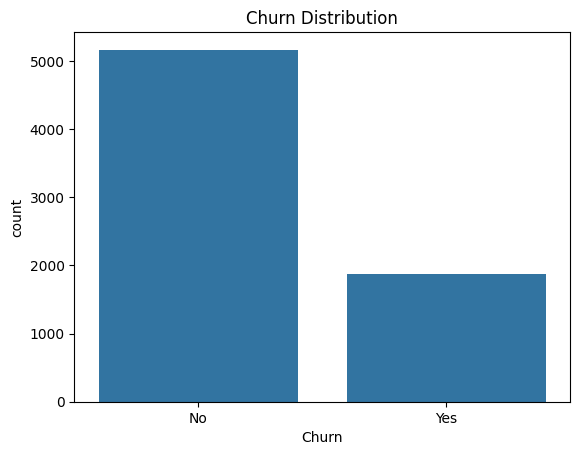

In [2]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()


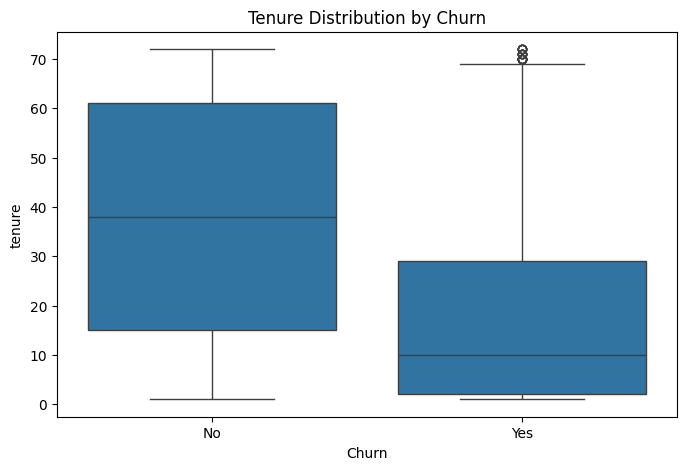

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure Distribution by Churn")
plt.show()


Customers who churn tend to have significantly lower tenure.
Early customer lifecycle is the most vulnerable stage.


### Monthly Charges vs Churn

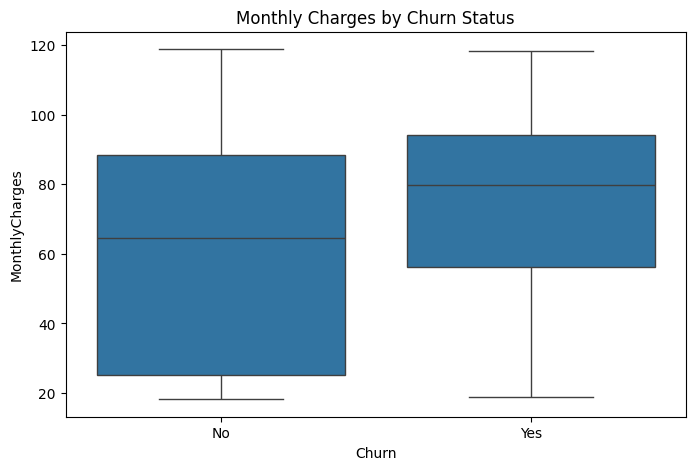

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn Status")
plt.show()


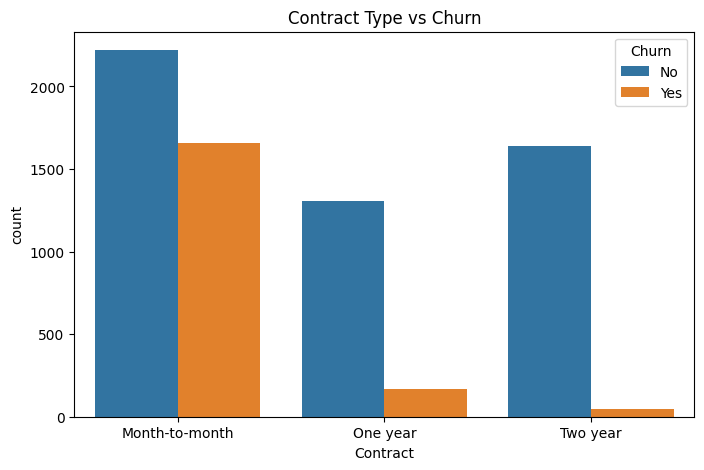

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.show()


Month-to-month customers dominate churn cases.


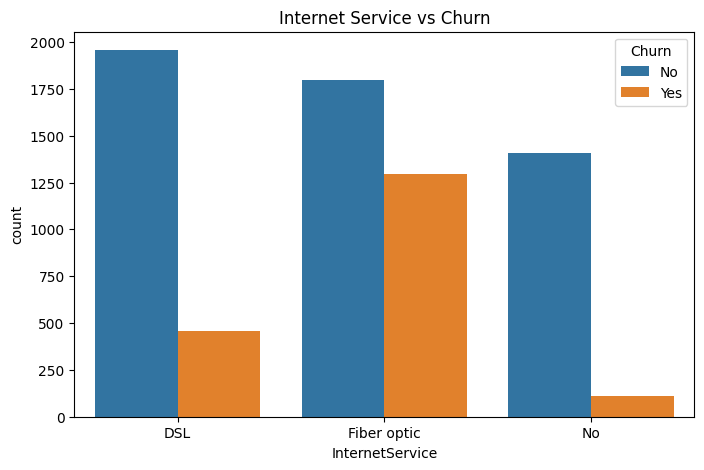

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn")
plt.show()


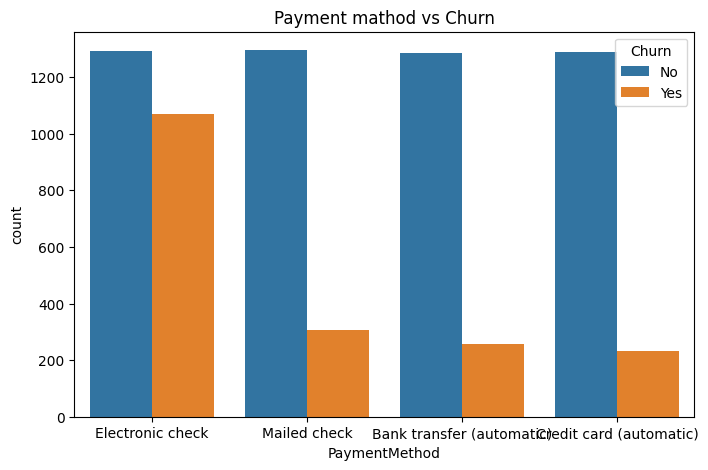

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Payment mathod vs Churn")
plt.show()


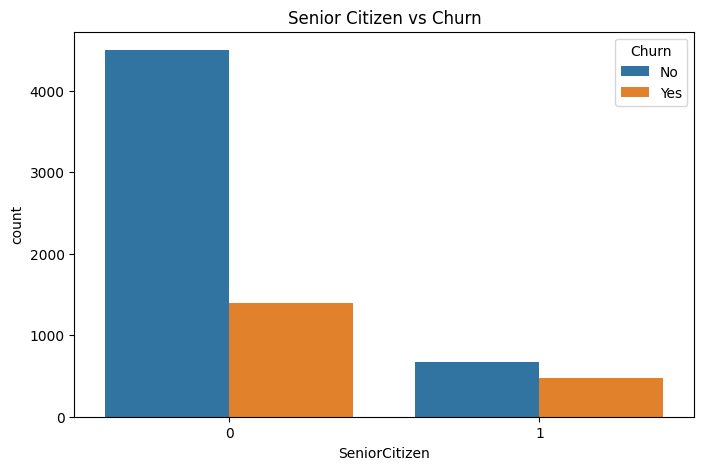

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("Senior Citizen vs Churn")
plt.show()


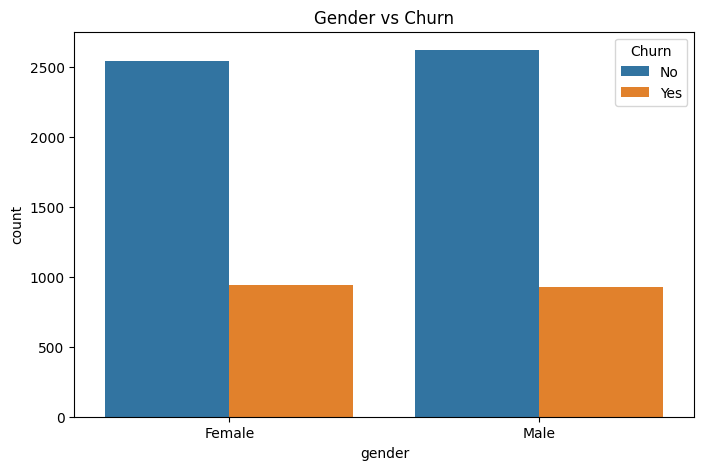

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Gender vs Churn")
plt.show()


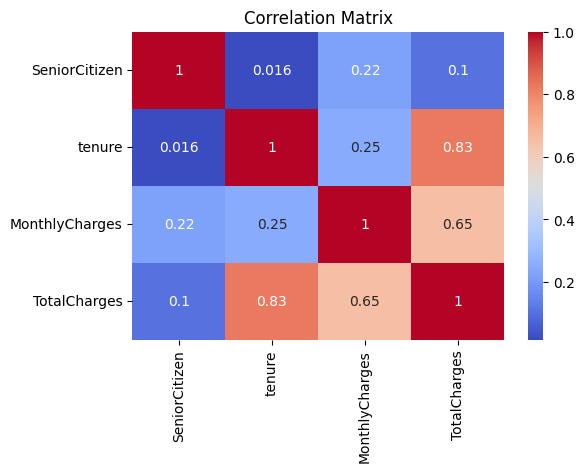

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


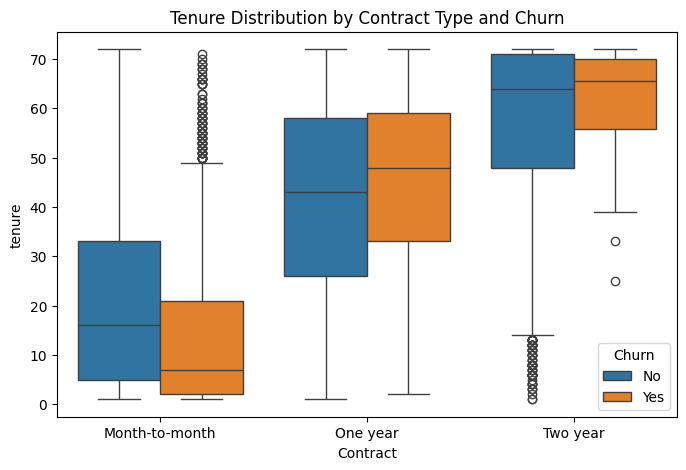

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Contract", y="tenure", hue="Churn")
plt.title("Tenure Distribution by Contract Type and Churn")
plt.show()


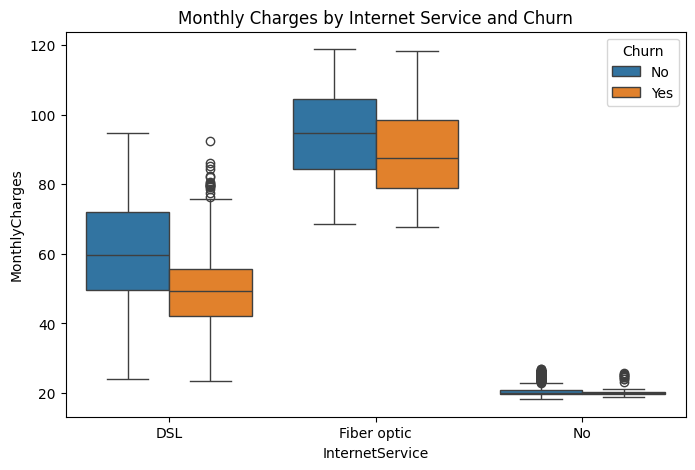

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="InternetService", y="MonthlyCharges", hue="Churn")
plt.title("Monthly Charges by Internet Service and Churn")
plt.show()


The Fibre optic has the highest average monthly charge. 

In [24]:
pd.crosstab(
    [df["Contract"], df["InternetService"]],
    df["Churn"],
    normalize="index"
)


Churn                                 No       Yes
Contract       InternetService                    
Month-to-month DSL              0.677841  0.322159
               Fiber optic      0.453947  0.546053
               No               0.811069  0.188931
One year       DSL              0.907018  0.092982
               Fiber optic      0.807050  0.192950
               No               0.975207  0.024793
Two year       DSL              0.980738  0.019262
               Fiber optic      0.927739  0.072261
               No               0.992101  0.007899

Multivariate analysis reveals that churn risk is highly concentrated among customers on month-to-month contracts with fiber optic internet (54.6% churn rate).

In contrast, two-year contract customers without internet service exhibit extremely low churn (~0.8%).

This suggests that contract type strongly moderates churn behavior across service types, and retention strategies should prioritize high-risk fiber optic customers on flexible contracts.


In [25]:
df.groupby(["Contract", "InternetService", "Churn"])["MonthlyCharges"].sum().reset_index()


,Contract,InternetService,Churn,MonthlyCharges
0,Month-to-month,DSL,No,43051.20
1,Month-to-month,DSL,Yes,18367.25
2,Month-to-month,Fiber optic,No,84699.10
3,Month-to-month,Fiber optic,Yes,100482.00
4,Month-to-month,No,No,8696.75
5,Month-to-month,No,Yes,1997.85
6,One year,DSL,No,31639.90
7,One year,DSL,Yes,3356.25
8,One year,Fiber optic,No,42670.20
9,One year,Fiber optic,Yes,10571.95


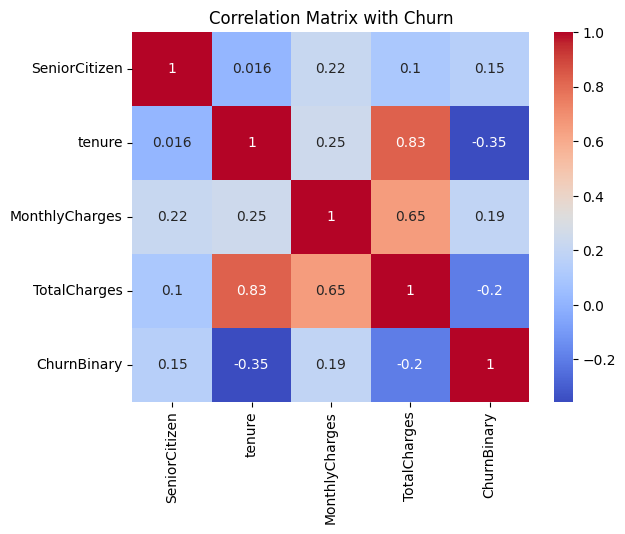

In [26]:
df["ChurnBinary"] = df["Churn"].map({"Yes":1, "No":0})

numeric_df = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix with Churn")
plt.show()
